<a href="https://colab.research.google.com/github/AfsanehShamsaddini/customer_churn_dataset/blob/main/customer_churn_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,f1_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb

import warnings
warnings.filterwarnings('ignore')
RSEED = 42

In [216]:
# Load the datase
churn_data = pd.read_csv('/content/drive/MyDrive/ML/churn/customer_churn_dataset-testing-master.csv')

In [217]:
# printing the first 5 rows of the Dataframe
churn_data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [218]:
# Numbers of rows and columns
churn_data.shape

(64374, 12)

In [219]:
# Getting some information about data
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


## Detecting Mixed Types

In [220]:

def detect_mixed_data(df):
  mixed_data = {}
  for column in df.columns:
    types = df[column].apply(lambda x: type(x).__name__).value_counts()
    if len(types) > 1:
      mixed_data[column] =  types.to_dict()
  return mixed_data

mixed_column = detect_mixed_data(churn_data)
print(f'Columns with mixed types: {mixed_column}')

Columns with mixed types: {}


## Handling Missing Data

In [221]:
# Check the number of missing values in each column
mising_values = churn_data.isnull().sum()

# Calculate percentage of missing values
mising_percentages = 100 * mising_values / len(churn_data)

# Combine counts and percentages in a single dataframe
mising_table = pd.concat(
    [mising_values, mising_percentages],
    axis=1,
    keys = ['mising_values', 'mising_percentages'],
)

mising_table

,mising_values,mising_percentages
CustomerID,0,0.0
Age,0,0.0
Gender,0,0.0
Tenure,0,0.0
Usage Frequency,0,0.0
Support Calls,0,0.0
Payment Delay,0,0.0
Subscription Type,0,0.0
Contract Length,0,0.0
Total Spend,0,0.0


## Data Analysis

In [222]:
# Getting some statistical measures about the data
churn_data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


## Data Visualization

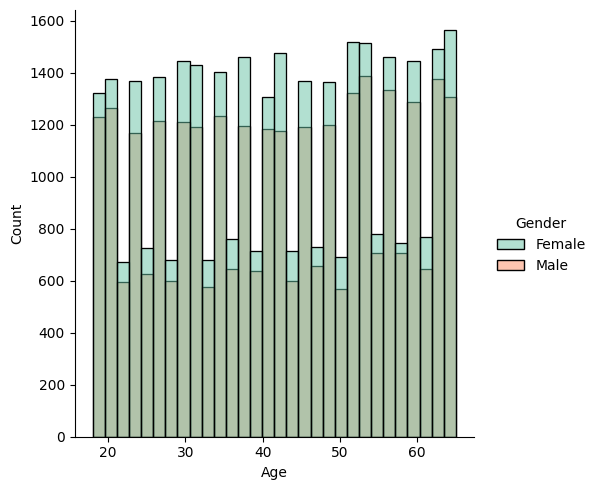

In [223]:

sns.displot(
    data=churn_data,
    x='Age',
    bins=30,
    hue='Gender',
    palette='Set2',
)

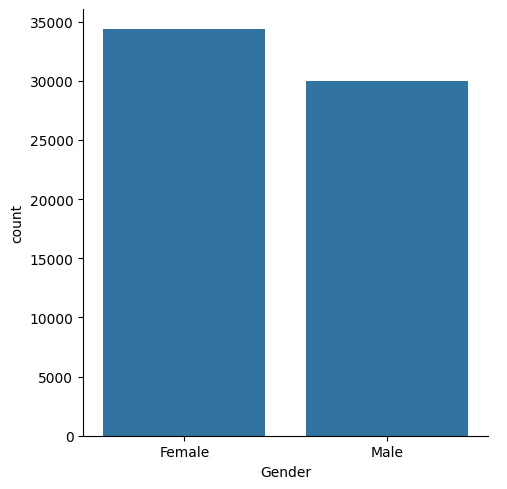

In [224]:
sns.catplot(
    data=churn_data,
    x='Gender',
    kind='count',
)

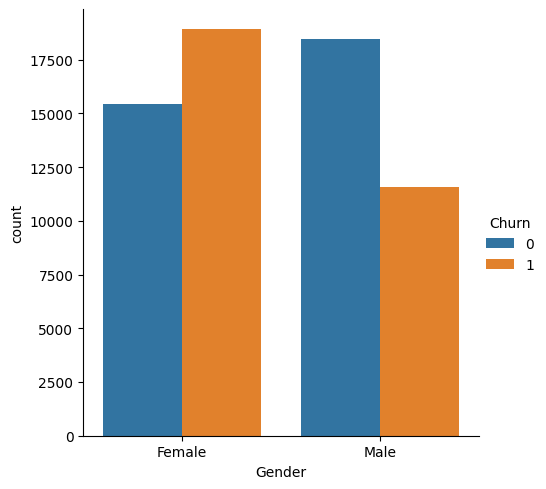

In [225]:
sns.catplot(
    data=churn_data,
    x='Gender',
    kind='count',
    hue='Churn',
)

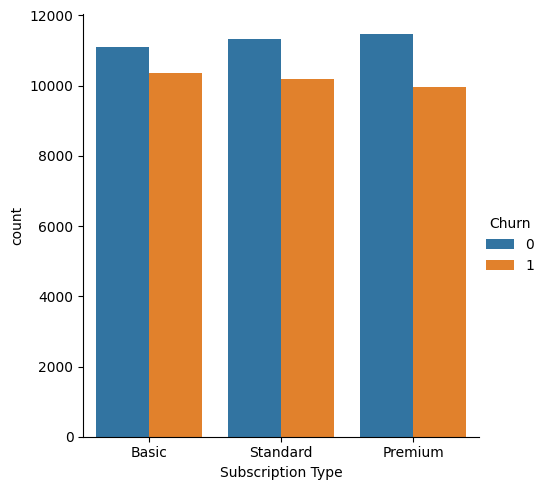

In [226]:
sns.catplot(
    data=churn_data,
    x='Subscription Type',
    kind='count',
    hue='Churn',
)

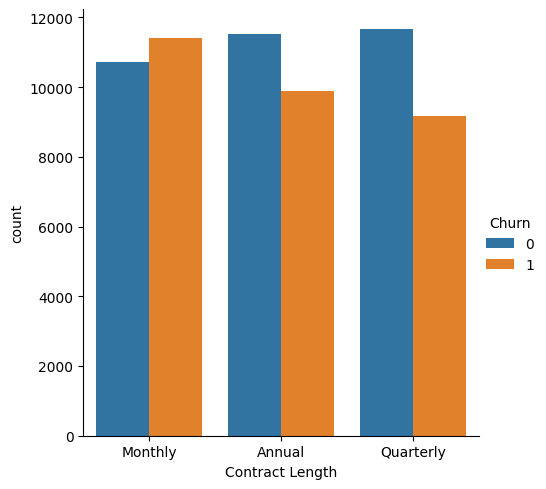

In [227]:
sns.catplot(
    data=churn_data,
    x='Contract Length',
    kind='count',
    hue='Churn',
)

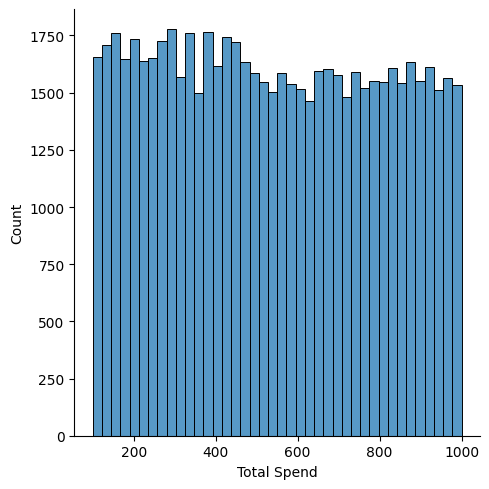

In [228]:
sns.displot(
    data=churn_data,
    x='Total Spend',
    # hue='Churn',
)

<Axes: xlabel='Subscription Type', ylabel='Total Spend'>

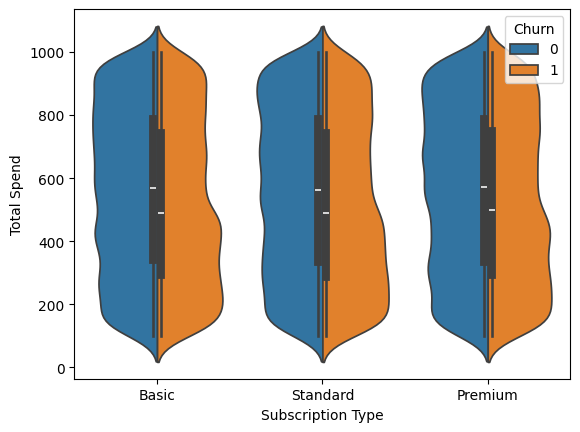

In [229]:
sns.violinplot(
    data=churn_data,
    x='Subscription Type',
    y ='Total Spend',
    hue='Churn',
    split=True,
)

<Axes: xlabel='Gender', ylabel='Age'>

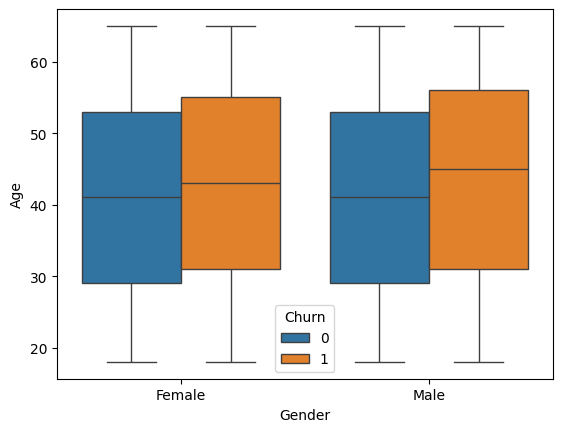

In [230]:
sns.boxplot(
    data=churn_data,
    x='Gender',
    y ='Age',
    hue='Churn',
)

<Axes: >

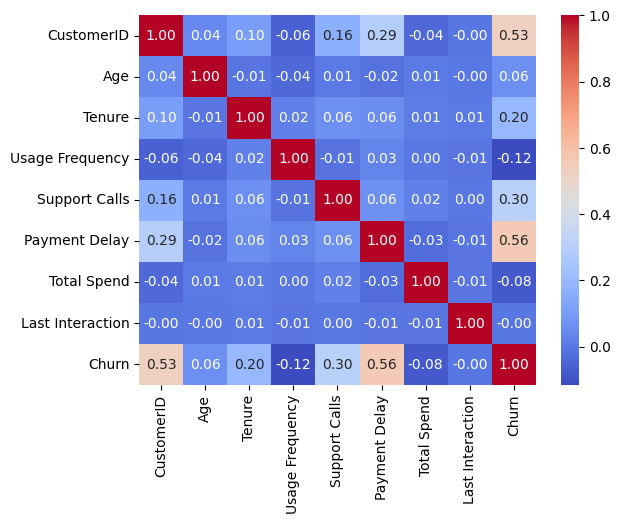

In [231]:
churn_numeric = churn_data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(
    data=churn_numeric.corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
)


## Preprocessing

In [232]:
if 'CustomerID' in churn_data.columns:
    churn_data = churn_data.drop(columns='CustomerID', axis=1)

In [233]:
X = churn_data.drop(columns='Churn', axis=1)
y = churn_data['Churn']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=RSEED,
)
print("Training dataset shape:", X_train.shape, y_train.shape)
print("Test dataset shape:",X_test.shape, y_test.shape)

Training dataset shape: (51499, 10) (51499,)
Test dataset shape: (12875, 10) (12875,)


## Preprocessor: numeric + categorical

In [234]:

numeric_transformer =  StandardScaler()

categorical_transformer = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False,
    )

preprocessing = ColumnTransformer(
    transformers = [
        ('num',numeric_transformer, numeric_features),
        ('cat',categorical_transformer, categorical_features)
    ]
)



## Modeling

In [235]:
models = {
    'Logistic Regression': LogisticRegression(random_state=RSEED, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=RSEED),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=RSEED),
    'Support Vector Machine': SVC(probability=True, random_state=RSEED),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RSEED),
    'Gradient Boosting':GradientBoostingClassifier(random_state=RSEED),
}

pipeline={}
for name, model in models.items():
  pipeline[name] = ImbPipeline(steps=[
      ('preprocessor', preprocessing),
      ('smote', SMOTE(random_state=RSEED)),
      ('model', model)
  ])



## Train & Evaluate

In [236]:
results = []

for name, pipe in pipeline.items():
  print(f'\nTraining and evaluating: {name}')

  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)

  # Probability score for ROC
  if hasattr(pipe.named_steps["model"], "predict_proba"):
      y_score = pipe.predict_proba(X_test)[:, 1]
  else:
      y_score = y_pred


  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_score)

  print(classification_report(y_test, y_pred))
  print("Confusion matrix:\n",confusion_matrix(y_test, y_pred), '\n')
  print(f'Accuracy: {accuracy}')
  print(f'Recall: {recall}')
  print(f'F1 Score: {f1}')
  print(f'ROC AUC: {roc_auc}')

  results.append({
      'Model': name,
      'Accuracy': accuracy,
      'Recall': recall,
      'F1 Score': f1,
      'ROC AUC': roc_auc,
  })
  print('-'*50, '\n')

result_df = pd.DataFrame(results).sort_values(by='ROC AUC', ascending=False).reset_index(drop=True)

print("\nSummary:\n",result_df)


Training and evaluating: Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      6793
           1       0.81      0.84      0.82      6082

    accuracy                           0.83     12875
   macro avg       0.83      0.83      0.83     12875
weighted avg       0.83      0.83      0.83     12875

Confusion matrix:
 [[5558 1235]
 [ 945 5137]] 

Accuracy: 0.8306796116504854
Recall: 0.8446234791187109
F1 Score: 0.8249558374819335
ROC AUC: 0.9088479334370987
-------------------------------------------------- 


Training and evaluating: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875

Confusion matrix:
 [[6790    3]
 [  12 6070]] 

## Plot comparison

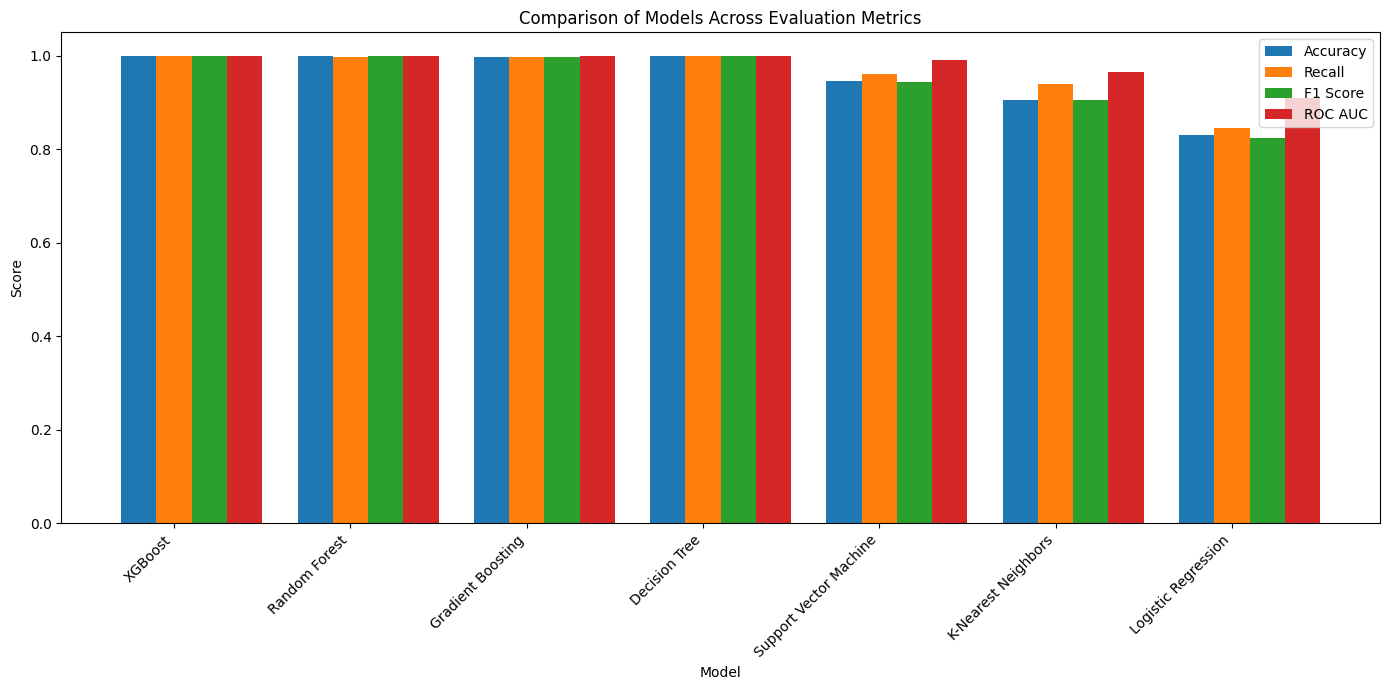

In [237]:

metrics = ['Accuracy', 'Recall', 'F1 Score', 'ROC AUC']
x = np.arange(len(result_df['Model']))
width = 0.2

plt.figure(figsize=(14, 7))

for i, metric in enumerate(metrics):
    plt.bar(x + i * width, result_df[metric], width, label = metric)

plt.xticks(x + width, result_df['Model'], rotation=45, ha='right')
plt.title("Comparison of Models Across Evaluation Metrics")
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()

plt.show()